In [2]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np

In [32]:
def variance(x):
    var = 0
    for xi in x:
        var += (xi-avg)**2
    var /= len(x) - 1
    return var

In [42]:
Nexp = 100              # number of experiments
tau = 26.0             # lifetime of charged pion (ns)
dt = 1.0               # size of time interval (ns)
tmax = 100             # time range (ns)
prob = dt/tau          # decay probability in interval dt

In [43]:
time = np.arange(0.0,tmax,dt,dtype=int)
Npdata = np.zeros((tmax,Nexp),dtype=float)
Nmdata = np.zeros((tmax,Nexp),dtype=float)
dNpdata = np.zeros((tmax,Nexp),dtype=float)
dNmdata = np.zeros((tmax,Nexp),dtype=float)
print(np.shape(Npdata))

(100, 100)


In [44]:
for ie in range(Nexp):    
    Npi = 100               # pion number
    Nmu = 0                # muon number
    for it in range(tmax): # loop over time steps
        Npdata[it][ie] = Npi
        Nmdata[it][ie] = Nmu
        dNpdata[it][ie] = np.sqrt(Npi)
        dNmdata[it][ie] = np.sqrt(Nmu)
        Ndecay = 0
        for ip in range(Npi): # loop over surviving pions
            if np.random.ranf() < prob:
                Ndecay += 1
        Npi -= Ndecay
        Nmu += Ndecay

Text(0, 0.5, 'Npi, Nmu')

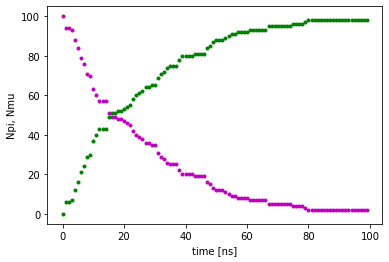

In [45]:
plt.plot(time,Npdata[:,0],"m.")
plt.plot(time,Nmdata[:,0],"g.")
plt.xlabel("time [ns]")
plt.ylabel("Npi, Nmu")

In [46]:
# set fit range
tmin = 10
tmax = 100
time = time[tmin:tmax]
Npdata = Npdata[tmin:tmax,:]
Nmdata = Nmdata[tmin:tmax,:]
dNpdata = dNpdata[tmin:tmax,:]
dNmdata = dNmdata[tmin:tmax,:]

pion counting method, tau_pi 22.12 +/-  0.18
pion counting mean, tau_pi 25.24 +/-  3.13


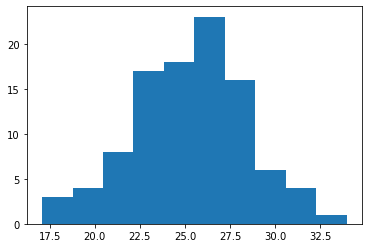

In [51]:
def fpi(t, p1, p2):
    return p1*np.exp(-t/p2)
taupi1 = []
for ie in range(Nexp):  
    pars, covs = fit.curve_fit(fpi, time, Npdata[:,ie], p0=[Npi,25.])
    Npfit1 = fpi(time, pars[0], pars[1])
    taupi1.append(pars[1])
print( "pion counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
avg = sum(taupi1)/len(taupi1)
sdv = np.sqrt(variance(taupi1))
print("pion counting mean, tau_pi %5.2f +/- %5.2f" % (avg,sdv))
cnts, bins, bars = plt.hist(taupi1, bins=10, label="taupi1")

muon counting method, tau_pi 32.58 +/-  0.86
muon counting mean, tau_mu 25.98 +/-  3.88


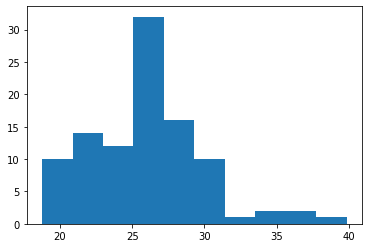

In [56]:
def fmu(t, p1, p2):
    return p1*(1.-np.exp(-t/p2))
taumu1 = []
for ie in range(Nexp):  
    pars, covs = fit.curve_fit(fmu, time, Nmdata[:,ie], p0=[0.,25.])
    Nmfit1 = fmu(time, pars[0], pars[1])
    taumu1.append(pars[1])
print( "muon counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
avg = sum(taumu1)/len(taumu1)
sdv = np.sqrt(variance(taumu1))
print("muon counting mean, tau_mu %5.2f +/- %5.2f" % (avg,sdv))
cnts, bins, bars = plt.hist(taumu1, bins=10, label="taumu1")

pion counting method, tau_pi 21.39 +/-  0.58
pion counting mean, tau_pi 25.26 +/-  3.04


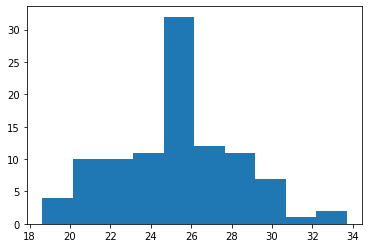

In [57]:
def fpi(t, p1, p2):
    return p1*np.exp(-t/p2)
taupi2 = []
for ie in range(Nexp):  
    pars, covs = fit.curve_fit(fpi, time, Npdata[:,ie], sigma = dNpdata[:,ie], p0=[Npi,25.], absolute_sigma=True)
    Npfit2 = fpi(time, pars[0], pars[1])
    taupi2.append(pars[1])
print( "pion counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
avg = sum(taupi2)/len(taupi2)
sdv = np.sqrt(variance(taupi2))
print("pion counting mean, tau_pi %5.2f +/- %5.2f" % (avg,sdv))
cnts, bins, bars = plt.hist(taupi2, bins=10, label="taupi2")

muon counting method, tau_pi 28.79 +/-  1.85


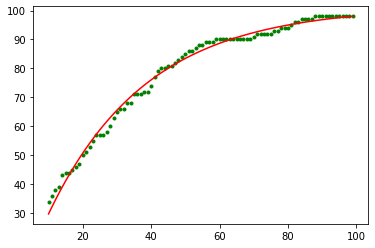

In [49]:
def fmu(t, p1, p2):
    return p1*(1.-np.exp(-t/p2))
pars, covs = fit.curve_fit(fmu, time, Nmdata, sigma = dNmdata, p0=[0.,25.], absolute_sigma=True)
Nmfit2 = fmu(time, pars[0], pars[1])
#dNmfit = np.sqrt(Nmfit2)
#pars, covs = fit.curve_fit(fmu, time, Nmdata, sigma = dNmfit, p0=[0.,25.], absolute_sigma=True)
#Nmfit3 = fmu(time, pars[0], pars[1])
plt.plot(time,Nmdata,"g.")
plt.plot(time,Nmfit2,"r-")
print( "muon counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))

pion counting method, tau_pi 21.63 +/-  0.59
pion counting mean, tau_pi 25.56 +/-  3.72


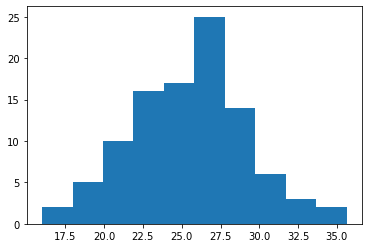

In [62]:
dNpfit = np.sqrt(Npfit2)
taupi3 = []
for ie in range(Nexp):  
    pars, covs = fit.curve_fit(fpi, time, Npdata[:,ie], sigma = dNpfit, p0=[Npi,25.], absolute_sigma=True)
    Npfit3 = fpi(time, pars[0], pars[1])
    taupi3.append(pars[1])
print( "pion counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
avg = sum(taupi3)/len(taupi3)
sdv = np.sqrt(variance(taupi3))
print("pion counting mean, tau_pi %5.2f +/- %5.2f" % (avg,sdv))
cnts, bins, bars = plt.hist(taupi3, bins=10, label="taupi3")

muon counting method, tau_pi 28.65 +/-  1.83


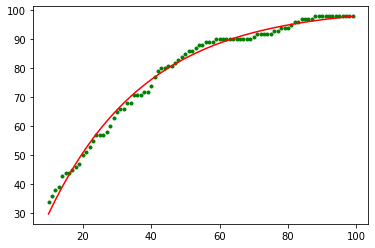

In [51]:
dNmfit = np.sqrt(Nmfit2)
pars, covs = fit.curve_fit(fmu, time, Nmdata, sigma = dNmfit, p0=[0.,25.], absolute_sigma=True)
Nmfit3 = fmu(time, pars[0], pars[1])
plt.plot(time,Nmdata,"g.")
plt.plot(time,Nmfit3,"r-")
print( "muon counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))

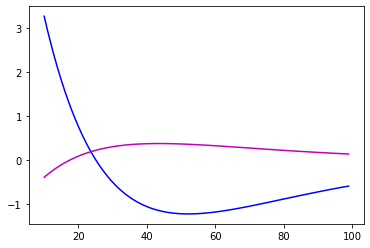

In [54]:
plt.plot(time,Npfit2-Npfit1,"b-")
plt.plot(time,Npfit3-Npfit2,"m-")

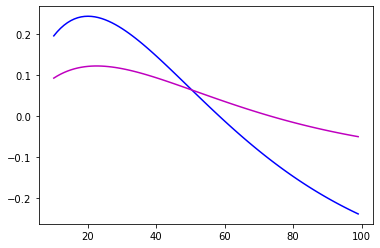

In [55]:
plt.plot(time,Nmfit2-Nmfit1,"b-")
plt.plot(time,Nmfit3-Nmfit2,"m-")